In [51]:
import pandas as pd
from rdkit.Chem import MolFromSmiles

dataset = 'ZINC10M/0'
dataset = 'PUBCHEM/0'
dataset = 'PCBA'

troncate = 100000

smiles = pd.read_csv(f'data/smiles/{dataset}.csv')['smiles'][:troncate]
mols = [MolFromSmiles(s) for s in smiles]
mols = [m for m in mols if m is not None]

dataset_size = len(mols)

[16:25:01] WARNING: not removing hydrogen atom without neighbors


In [52]:
atomic_num_count = {}
all_sizes = []

for mol in mols:
    atomic_nums = [atom.GetAtomicNum() for atom in mol.GetAtoms()]
    unique_atoms = set(atomic_nums)
    for num in unique_atoms:
        if num not in atomic_num_count:
            atomic_num_count[num] = 0
        atomic_num_count[num] += 1
    all_sizes.append(len(atomic_nums))
atomic_num_freq = {k: v/dataset_size for k, v in atomic_num_count.items()}

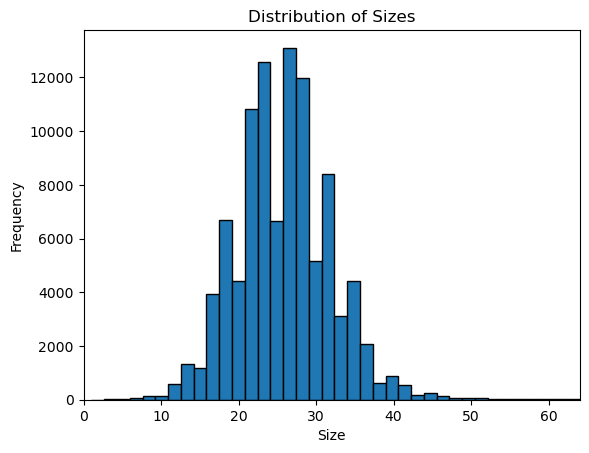

Max size: 331
Min size: 1
Average size: 25.9555
Fraction below 32: 0.83394


In [53]:
import matplotlib.pyplot as plt

plt.hist(all_sizes, bins=200, edgecolor='black')
plt.xlim(0, 64)
plt.title('Distribution of Sizes')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.show()

print('Max size:', max(all_sizes))
print('Min size:', min(all_sizes))
print('Average size:', sum(all_sizes) / len(all_sizes))
print('Fraction below 32:', sum([s < 32 for s in all_sizes]) / len(all_sizes))

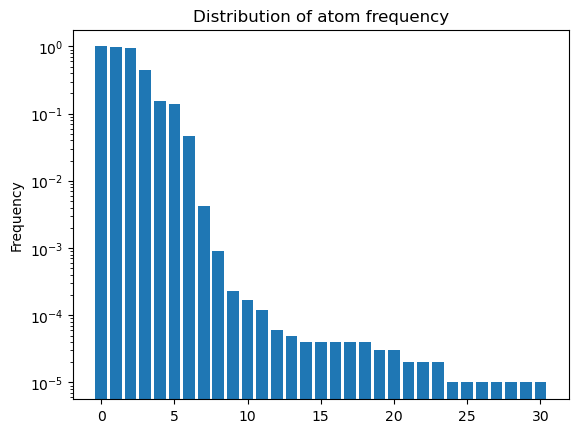

In [54]:
import numpy as np

freqs = [freq for freq in atomic_num_freq.values()]
freqs = sorted(freqs, reverse=True)

plt.bar(np.arange(len(freqs)),freqs, log=True)
plt.title('Distribution of atom frequency')
plt.ylabel('Frequency')
plt.show()

In [55]:
def get_k_most_frequent_atoms(k):
    sorted_atoms = sorted(atomic_num_freq.items(), key=lambda item: item[1], reverse=True)
    return [a for a, f in sorted_atoms[:k]]

def dataset_coverage(valid_atom_list, max_size=1000):
    coverage = 0
    n = 0
    for mol in mols:
        atomic_nums = [atom.GetAtomicNum() for atom in mol.GetAtoms()]
        if len(atomic_nums) <= max_size:
            unique_atoms = set(atomic_nums)
            if unique_atoms.issubset(valid_atom_list):
                coverage += 1
            n += 1
    return coverage/n

In [56]:
k = 64
# You can change this value to get a different number of most frequent atoms
most_frequent_atoms = get_k_most_frequent_atoms(k)
print('Most frequent atoms:', most_frequent_atoms)

PUBCHEM_top_8 = [6, 8, 7, 17, 16, 9, 35, 15]
PUBCHEM_top_16 = [6, 8, 7, 17, 16, 9, 35, 15, 53, 14, 11, 33, 80, 50, 5, 20]
PUBCHEM_top_32 = [6, 8, 7, 17, 16, 9, 35, 15, 53, 14, 11, 33, 80, 50, 5, 20, 19, 30, 26, 34, 13, 29, 12, 82, 24, 27, 1, 28, 56, 78, 25, 51]
PUBCHEM_top_64 = [6, 8, 7, 17, 16, 9, 35, 15, 53, 14, 11, 33, 80, 50, 5, 20, 19, 30, 26, 34, 13, 29, 12, 82, 24, 27, 1, 28, 56, 78, 25, 51, 52, 22, 47, 32, 3, 48, 23, 38, 46, 40, 4, 42, 79, 92, 81, 83, 74, 58, 31, 49, 44, 77, 41, 63, 45, 64, 70, 57, 73, 39, 90, 55]

Most frequent atoms: [6, 7, 8, 16, 17, 9, 35, 15, 53, 14, 5, 33, 50, 80, 13, 51, 26, 34, 29, 27, 78, 48, 83, 24, 38, 25, 47, 28, 82, 1, 64]


In [57]:
for k, list in zip([8, 16, 32, 64], [PUBCHEM_top_8, PUBCHEM_top_16, PUBCHEM_top_32, PUBCHEM_top_64]):
    list = list[:-1]
    coverage = dataset_coverage(list, max_size = 32)
    print(f'Graphs with [ukn] atom using dic size {k}: {100*(1-coverage):.2f}%')

Graphs with [ukn] atom using dic size 8: 0.59229%
Graphs with [ukn] atom using dic size 16: 0.04010%
Graphs with [ukn] atom using dic size 32: 0.01260%
Graphs with [ukn] atom using dic size 64: 0.00000%
